# 필요 라이브러리 import

In [248]:
import pandas as pd                                          #데이터 분석 라이브러리
from sklearn.decomposition import PCA                        #주성분 분석 라이브러리
import numpy as np                                           # 계산 라이브러리
from sklearn.preprocessing import MinMaxScaler               # scale 라이브러리
from sklearn.preprocessing import StandardScaler               # scale 라이브러리


from sklearn.model_selection import train_test_split         # 데이터 분할 라이브러리
from sklearn.model_selection import cross_validate           # Kfold 라이브러리
from sklearn.model_selection import cross_val_score          # Kfold 라이브러리
from sklearn.model_selection import StratifiedKFold          # Kfold 라이브러리


from sklearn.neighbors import KNeighborsClassifier           # KNN 라이브러리
from sklearn.svm import SVC                                  # SVM Classifier 라이브러리
from sklearn.tree import DecisionTreeClassifier              # 결정나무분류 라이브러리
from sklearn.linear_model import LogisticRegression          # 로지스틱 회귀 라이브러리
from bayes_opt import BayesianOptimization                   # 베이시안 라이브러리   


from sklearn.metrics import make_scorer                      # 평가용 라이브러리
from sklearn.metrics import f1_score                         # f1  라이브러리
from sklearn.metrics import accuracy_score                   # accuracy 라이브러리 



import matplotlib.pyplot as plt                              # 그래프 라이브러리
from sklearn.ensemble import VotingClassifier                # 보팅 앙상블 라이브러리
import seaborn as sns                                        # boxplot 을 위한 라이브러리

# data 불러오기

In [249]:
# 데이터 불러오기
File = pd.read_csv("../../Data/final_data/training/geo_data/geo_training_data.csv")

In [250]:
File

,PUMP_RATIO,Hourly_Rainfall_Weight,Impervious_Surface_Weight,SLOPE_AVG_Weight,HIGH_Weight,F_WEIGHT,FLOOD
0,4.115226e-07,0.104348,0.467342,0.599952,0.045968,0.075019,0
1,4.115226e-07,0.208696,0.467342,0.599952,0.045968,0.075019,0
2,4.115226e-07,0.259722,0.467342,0.599952,0.045968,0.075019,1
3,4.115226e-07,0.010870,0.467342,2.699784,0.072218,0.075019,0
4,4.115226e-07,0.108696,0.467342,2.699784,0.072218,0.075019,1
...,...,...,...,...,...,...,...
791,1.364381e-08,0.573248,1.156156,7.040000,115.950324,0.016667,0
792,1.364381e-08,0.573248,1.156156,21.608643,13.159136,0.016667,0
793,1.364381e-08,0.573248,1.156156,12.147570,0.066817,0.016667,0
794,1.364381e-08,0.573248,1.156156,21.608643,0.061794,0.016667,0


In [251]:
#File = File.sample(frac=1).reset_index(drop=True)

In [252]:
Floodfile = File.drop(['FLOOD'], axis = 1)  # 필요 독립변수
Floodclass = File['FLOOD']                                            # 종속 변수 

In [253]:
Floodfile

,PUMP_RATIO,Hourly_Rainfall_Weight,Impervious_Surface_Weight,SLOPE_AVG_Weight,HIGH_Weight,F_WEIGHT
0,4.115226e-07,0.104348,0.467342,0.599952,0.045968,0.075019
1,4.115226e-07,0.208696,0.467342,0.599952,0.045968,0.075019
2,4.115226e-07,0.259722,0.467342,0.599952,0.045968,0.075019
3,4.115226e-07,0.010870,0.467342,2.699784,0.072218,0.075019
4,4.115226e-07,0.108696,0.467342,2.699784,0.072218,0.075019
...,...,...,...,...,...,...
791,1.364381e-08,0.573248,1.156156,7.040000,115.950324,0.016667
792,1.364381e-08,0.573248,1.156156,21.608643,13.159136,0.016667
793,1.364381e-08,0.573248,1.156156,12.147570,0.066817,0.016667
794,1.364381e-08,0.573248,1.156156,21.608643,0.061794,0.016667


# minmaxscaler
## data scale 과정

In [254]:
scaler = MinMaxScaler()
scaler.fit(Floodfile)
Floodfile = scaler.transform(Floodfile)  # data sclae 과정 -> minmaxscaler 를 통해 0~1의 값으로 변환

In [255]:
Floodfile

array([[3.97878882e-06, 1.82028986e-01, 1.93804093e-01, 0.00000000e+00,
        2.74362826e-05, 4.37886848e-01],
       [3.97878882e-06, 3.64057971e-01, 1.93804093e-01, 0.00000000e+00,
        2.74362826e-05, 4.37886848e-01],
       [3.97878882e-06, 4.53070988e-01, 1.93804093e-01, 0.00000000e+00,
        2.74362826e-05, 4.37886848e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 5.49659102e-01,
        4.09911127e-05, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        3.77248886e-05, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        2.91335963e-01, 0.00000000e+00]])

# PCA

In [256]:
pca = PCA(n_components=4)  # 주성분 분석 후 -> 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(Floodfile)  
Floodfile = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2','principal component3','principal component4'])
# pca를 통해 나온 4가지 주성분을 독립변수로 사용하도록 데이터 변형

In [257]:
Floodfile

,principal component1,principal component2,principal component3,principal component4
0,-0.011940,0.141868,-0.346867,0.120298
1,-0.034011,0.137298,-0.260972,-0.035119
2,-0.044803,0.135063,-0.218968,-0.111119
3,-0.003553,0.115147,-0.344956,0.306535
4,-0.024245,0.110863,-0.264429,0.160832
...,...,...,...,...
791,-0.459173,0.036658,0.376578,-0.516097
792,-0.532985,-0.169149,0.914837,-0.197536
793,-0.481033,-0.029302,0.558410,-0.410303
794,-0.532326,-0.168134,0.913709,-0.198502


# data split
## 8 : 2 으로 training 과 test 구분

In [258]:
x_train, x_test, y_train, y_test = train_test_split(Floodfile, Floodclass , test_size=0.2, random_state=400)

# BayesianOptimization

In [259]:
skfolds=StratifiedKFold(n_splits=5, random_state=400 ,shuffle = True)

# 베이지안최적화과정에서 Kfold 를 사용하기위해 설정

## KNN

In [260]:
KNN_search_point = {'k': (3,50), 'leaf': (1,50)}  # 각 옵션들의 범위를 정해줌

gp_params = {"alpha":1e-10}
scores_all = []
k_all = []
leaf_all=[]

def KNN_opt(k,leaf):
    cvscores = []
    
    for train_index, val_index in skfolds.split(x_train, y_train):

        x_skftrain, x_val = x_train.values[train_index], x_train.values[val_index]
        Y_skftrain, Y_val = np.array(y_train)[train_index],np.array(y_train)[val_index]
        # train 데이터를 5fold 를 사용해 검증하며 옵션 최적값 탐색을 위해 데이터 분할
        
        KNNmodel = KNeighborsClassifier(n_neighbors = int(k),weights = 'distance', leaf_size= leaf ) 
        # KNN 모델에 사용되는 옵션들의 최적값 탐색  
        
        KNNmodel2 = KNNmodel.fit(x_skftrain,Y_skftrain)        # 모델학습
        y_pred = KNNmodel2.predict(x_val)                      # 예측

        report = f1_score(Y_val, y_pred, average='weighted')  # F1
        cvscores.append(report)                               # 결과들을 리스트로 저장
    
    
    scores_all.append(np.mean(cvscores))
    k_all.append(int(k))
    
    return np.mean(cvscores)

result = BayesianOptimization(KNN_opt, KNN_search_point,    random_state=10,    verbose=2) 
result.maximize(acq='ucb',n_iter=15, kappa=2.576, init_points=1 , **gp_params)
# 타겟과 범위를 정해준뒤에 그 결과를 확인 n_iter를 통해 확인 횟수 조절가능

|   iter    |  target   |     k     |   leaf    |
-------------------------------------------------
|  1        |  0.7923   |  39.25    |  2.017    |
|  2        |  0.7906   |  26.48    |  25.79    |
|  3        |  0.7639   |  3.842    |  1.058    |
|  4        |  0.7854   |  49.9     |  49.91    |
|  5        |  0.7892   |  38.91    |  6.17     |
|  6        |  0.7638   |  3.787    |  49.76    |
|  7        |  0.7892   |  28.82    |  49.87    |
|  8        |  0.7923   |  35.44    |  3.554    |
|  9        |  0.7906   |  36.96    |  37.93    |
|  10       |  0.7823   |  24.95    |  1.027    |
|  11       |  0.7624   |  3.019    |  25.39    |
|  12       |  0.783    |  22.84    |  38.94    |
|  13       |  0.7923   |  39.91    |  49.89    |
|  14       |  0.7909   |  34.86    |  24.6     |
|  15       |  0.7907   |  29.71    |  17.27    |
|  16       |  0.7906   |  36.17    |  1.072    |


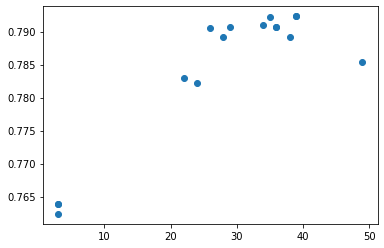

In [261]:
plt.scatter(k_all, scores_all)

## SVM

In [262]:
# KNN 과 동일 옵션만 바뀐 상태로 범위를 지정해주고 최적값을 탐색
SVM_search_point = {'k': (1,30), 'gamma': (0.001,20)}

gp_params = {"alpha":1e-10}
scores_all = []
k_all = []
gamma_all = []

def SVM_opt(k,gamma):
    cvscores = []
    
    for train_index, val_index in skfolds.split(x_train, y_train):
        
        x_skftrain, x_val = x_train.values[train_index],x_train.values[val_index]
        Y_skftrain, Y_val = np.array(y_train)[train_index],np.array(y_train)[val_index]

        SVMmodel = SVC( C= int(k) , kernel='rbf' , probability = True, gamma = gamma ) # SVM  
        
        SVMmodel2 = SVMmodel.fit(x_skftrain,Y_skftrain)      # 모델학습
        y_pred = SVMmodel2.predict(x_val)                    # 예측

        report = f1_score(Y_val, y_pred, average='weighted') # F1
        cvscores.append(report)
    
    scores_all.append(np.mean(cvscores))
    k_all.append(int(k))
    return np.mean(cvscores)

result = BayesianOptimization(SVM_opt, SVM_search_point, random_state=10, verbose=2) 
result.maximize(acq='ucb',n_iter=20, kappa=2.576, init_points=1 , **gp_params)

|   iter    |  target   |   gamma   |     k     |
-------------------------------------------------
|  1        |  0.7539   |  15.43    |  1.602    |
|  2        |  0.7552   |  9.991    |  15.67    |
|  3        |  0.7679   |  19.93    |  29.62    |
|  4        |  0.7694   |  19.96    |  29.95    |
|  5        |  0.7479   |  0.1515   |  29.97    |
|  6        |  0.7084   |  0.2132   |  1.085    |
|  7        |  0.756    |  10.99    |  29.92    |
|  8        |  0.7552   |  19.98    |  8.502    |
|  9        |  0.7497   |  19.95    |  1.171    |
|  10       |  0.7663   |  19.13    |  29.92    |
|  11       |  0.7368   |  0.1422   |  18.23    |
|  12       |  0.7509   |  9.848    |  8.242    |
|  13       |  0.7679   |  19.91    |  29.71    |
|  14       |  0.7663   |  20.0     |  18.67    |
|  15       |  0.7244   |  0.0898   |  9.559    |
|  16       |  0.7661   |  7.085    |  1.003    |
|  17       |  0.7621   |  13.07    |  22.93    |
|  18       |  0.7689   |  4.676    |  23.54    |


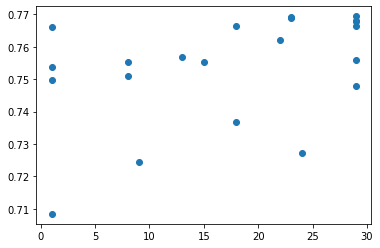

In [263]:
plt.scatter(k_all, scores_all)

## Decision Tree

In [264]:
DT_search_point = { 'k': (1,30), 'leaf' : ( 2, 30), 'split': (2,30) }

gp_params = {"alpha":1e-10}
scores_all = []
k_all = []
leaf_all = []
split_all = []

def DT_opt(k,leaf,split):
    cvscores = []
    
    for train_index, val_index in skfolds.split(x_train, y_train):
        x_skftrain, x_val = x_train.values[train_index],x_train.values[val_index]
        Y_skftrain, Y_val = np.array(y_train)[train_index],np.array(y_train)[val_index]

        DTmodel = DecisionTreeClassifier(criterion='gini',
                                         max_depth=int(k), 
                                         min_samples_leaf= int(leaf),
                                         min_samples_split= int(split)) #DT  
        
        
        DTmodel2 = DTmodel.fit(x_skftrain,Y_skftrain)      # 모델학습
        y_pred = DTmodel2.predict(x_val)                    # 예측

        report = f1_score(Y_val, y_pred, average='weighted') # F1
        cvscores.append(report)
    
    scores_all.append(np.mean(cvscores))
    k_all.append(int(k))
    leaf_all.append(int(leaf))
    split_all.append(split)

    
    return np.mean(cvscores)

result = BayesianOptimization(DT_opt, DT_search_point, random_state=10, verbose=2) 
result.maximize(acq='ucb',n_iter=15, kappa=2.576, init_points=1 , **gp_params)

|   iter    |  target   |     k     |   leaf    |   split   |
-------------------------------------------------------------
|  1        |  0.7558   |  23.37    |  2.581    |  19.74    |
|  2        |  0.7381   |  26.25    |  23.01    |  19.33    |
|  3        |  0.627    |  1.445    |  3.984    |  2.857    |
|  4        |  0.627    |  1.0      |  2.0      |  30.0     |
|  5        |  0.771    |  30.0     |  2.0      |  2.0      |
|  6        |  0.765    |  29.83    |  2.161    |  28.56    |
|  7        |  0.7272   |  29.41    |  28.76    |  3.344    |
|  8        |  0.7798   |  29.5     |  2.455    |  5.043    |
|  9        |  0.7659   |  29.91    |  9.274    |  12.63    |
|  10       |  0.627    |  1.0      |  30.0     |  19.73    |
|  11       |  0.7259   |  29.42    |  29.98    |  28.43    |
|  12       |  0.7665   |  29.88    |  2.11     |  17.83    |
|  13       |  0.7446   |  20.08    |  12.38    |  2.049    |
|  14       |  0.7678   |  22.58    |  2.282    |  4.791    |
|  15   

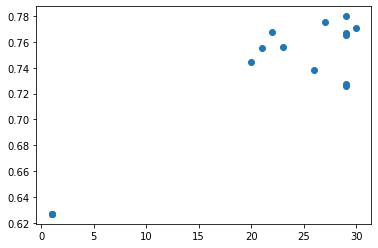

In [265]:
plt.scatter(k_all, scores_all)

## Logistic Regression

In [266]:
LR_search_point = { 'k': (1,50), 'tol':(0.0001,50)}

gp_params = {"alpha":1e-10}
scores_all = []
k_all = []

def LR_opt(k,tol):
    cvscores = []
    
    for train_index, val_index in skfolds.split(x_train, y_train):
        x_skftrain, x_val = x_train.values[train_index],x_train.values[val_index]
        Y_skftrain, Y_val = np.array(y_train)[train_index],np.array(y_train)[val_index]

        LRmodel = LogisticRegression(C= int(k) , multi_class= 'auto') #LR  
        
        
        LRmodel2 = LRmodel.fit(x_skftrain,Y_skftrain)      # 모델학습
        y_pred = LRmodel2.predict(x_val)                    # 예측

        report = f1_score(Y_val, y_pred, average='weighted') # F1
        cvscores.append(report)
    
    scores_all.append(np.mean(cvscores))
    k_all.append(int(k))
    
    return np.mean(cvscores)

result = BayesianOptimization(LR_opt, LR_search_point, random_state=10, verbose=2) 
result.maximize(acq='ucb',n_iter=20, kappa=2.576, init_points=1 , **gp_params)

|   iter    |  target   |     k     |    tol    |
-------------------------------------------------
|  1        |  0.7274   |  38.79    |  1.038    |
|  2        |  0.7256   |  25.48    |  25.29    |
|  3        |  0.7191   |  1.878    |  0.05957  |
|  4        |  0.7274   |  49.9     |  49.91    |
|  5        |  0.7274   |  35.73    |  4.828    |
|  6        |  0.7274   |  50.0     |  19.98    |
|  7        |  0.7274   |  44.87    |  32.48    |
|  8        |  0.7274   |  33.5     |  0.1829   |
|  9        |  0.7274   |  49.86    |  40.27    |
|  10       |  0.7274   |  44.62    |  21.11    |
|  11       |  0.7274   |  42.09    |  47.69    |
|  12       |  0.7274   |  38.99    |  1.759    |
|  13       |  0.7274   |  48.77    |  23.6     |
|  14       |  0.7274   |  36.62    |  1.325    |
|  15       |  0.7274   |  46.25    |  35.34    |
|  16       |  0.7274   |  44.32    |  37.87    |
|  17       |  0.7274   |  38.28    |  10.19    |
|  18       |  0.7274   |  38.72    |  40.81    |


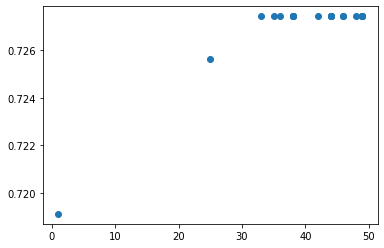

In [267]:
plt.scatter(k_all, scores_all)

# Voting ensemble
## 사용 된 모델 : KNN, SVM, Decision Tree, Logistic Regression

In [268]:
KNN_model = KNeighborsClassifier(n_neighbors = 21,weights = 'distance')

SVM_model = SVC( C= 20 , kernel='rbf' , probability = True , gamma = 20 )

DT_model = DecisionTreeClassifier(criterion='gini', max_depth=29, min_samples_leaf= 2, min_samples_split= 10)

LR_model = LogisticRegression(C= 12, multi_class= 'auto')

# 베이지안 최적화에서 탐색해 찾아낸 최적의 parameter 들을 넣고 Voting 을 위해 모델선언

In [269]:
ensemble=VotingClassifier(
        estimators=[('KNN',KNN_model),
                   ('SVM',SVM_model),
                   ('DT',DT_model),
                   ('LR',LR_model)]
        ,voting='soft')

# Voting 모델 안에 각 모델들을 묶어주기

In [270]:
KNN_model.fit(x_train,y_train)
SVM_model.fit(x_train,y_train)
DT_model.fit(x_train,y_train)
LR_model.fit(x_train,y_train)
ensemble.fit(x_train,y_train)

# 각 모델에  train 데이터 학습시키고
# 모델들이 묶어진 voting 앙상블에도 train 데이터를 학습

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=21,
                                                   p=2, weights='distance')),
                             ('SVM',
                              SVC(C=20, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=20, kernel='rbf', max_iter=-1,
                                  probability=True, random_...
                                                     presort='deprecated',
                                                     random_state=None

# 교차검증 적용

In [271]:
SKF = StratifiedKFold( n_splits = 5,  shuffle = True, random_state = 16)

In [272]:
KNN_scores=cross_validate(KNN_model, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
SVM_scores=cross_validate(SVM_model, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
DT_scores=cross_validate(DT_model, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
LR_scores=cross_validate(LR_model, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
ensemble_scores=cross_validate(ensemble, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))

# 각 모델들의 성능 평가를 위해 교차검증 실시  확인할 score는 f1 임

In [273]:
# print(KNN_scores)
# print(SVM_scores)
# print(DT_scores)
# print(LR_scores)
print(ensemble_scores)

# validate 를 통해 모델 학습시간, 모델 가동시간, f1_score 를 확인 가능

{'fit_time': array([0.05470133, 0.07083011, 0.09892726, 0.05934262, 0.06387115]), 'score_time': array([0.00796652, 0.01648784, 0.01335883, 0.00979519, 0.00905204]), 'test_score': array([0.68131868, 0.68181818, 0.75268817, 0.64367816, 0.72727273])}


In [274]:
KNN_f1_score = KNN_scores["test_score"].mean()
SVN_f1_score = SVM_scores["test_score"].mean()
DT_f1_score = DT_scores["test_score"].mean()
LR_f1_score = LR_scores["test_score"].mean()
ensemble_f1_score = ensemble_scores["test_score"].mean()


print("f1_score: {0: .4f}".format(KNN_f1_score))
print("f1_score: {0: .4f}".format(SVN_f1_score))
print("f1_score: {0: .4f}".format(DT_f1_score))
print("f1_score: {0: .4f}".format(LR_f1_score))
print("f1_score: {0: .4f}".format(ensemble_f1_score))

# 나온 값들의 평균을 확인을 위해 mean 값을 print로 표시

f1_score:  0.7188
f1_score:  0.6857
f1_score:  0.6865
f1_score:  0.5783
f1_score:  0.6974


# 결과 boxplot

## # 교차검증의 결과를 시각화 하여 보기 편하게 하고자함

## KNN

[Text(1, 0, 'KNN')]

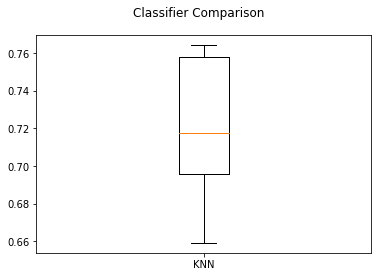

In [275]:
results = []
names = []

models = []
models.append(('KNN', KNN_model))


for name, model in models:
    kfold = StratifiedKFold( n_splits = 5,  shuffle = True, random_state = 10)
#     cv_results = cross_validate(ensemble, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
    cv_results = cross_val_score(KNN_model, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
    
    results.append(cv_results)
    names.append(name)
    
fig = plt.figure()
fig.suptitle('Classifier Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

## SVM

[Text(1, 0, 'SVM')]

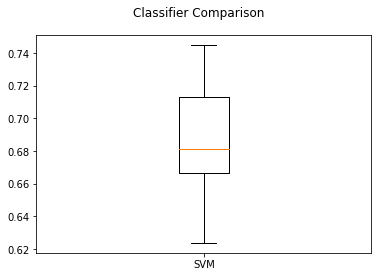

In [276]:
results = []
names = []

models = []

models.append(('SVM', SVM_model))


for name, model in models:
    kfold = StratifiedKFold( n_splits = 5,  shuffle = True, random_state = 10)
#     cv_results = cross_validate(ensemble, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
    cv_results = cross_val_score(SVM_model, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
    
    results.append(cv_results)
    names.append(name)
    
fig = plt.figure()
fig.suptitle('Classifier Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

## Decision Tree

[Text(1, 0, 'DT')]

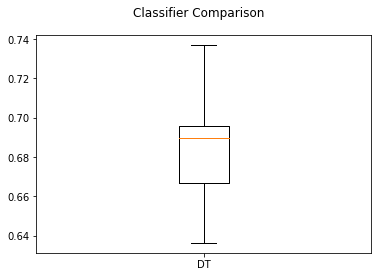

In [277]:
results = []
names = []

models = []
models.append(('DT', DT_model))


for name, model in models:
    kfold = StratifiedKFold( n_splits = 5,  shuffle = True, random_state = 10)
#     cv_results = cross_validate(ensemble, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
    cv_results = cross_val_score(DT_model, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
    
    results.append(cv_results)
    names.append(name)
    
fig = plt.figure()
fig.suptitle('Classifier Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

## Logistic regression

[Text(1, 0, 'LR')]

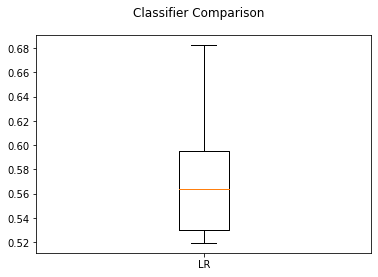

In [278]:
results = []
names = []

models = []
models.append(('LR', LR_model))


for name, model in models:
    kfold = StratifiedKFold( n_splits = 5,  shuffle = True, random_state = 10)
#     cv_results = cross_validate(ensemble, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
    cv_results = cross_val_score(LR_model, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
    
    results.append(cv_results)
    names.append(name)
    
fig = plt.figure()
fig.suptitle('Classifier Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

## Voting ensemble

[Text(1, 0, 'Voting')]

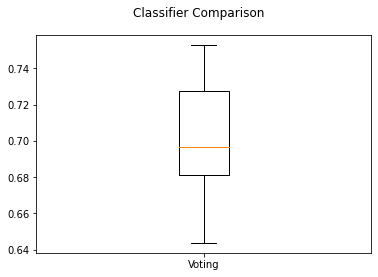

In [279]:
results = []
names = []

models = []
models.append(('Voting',ensemble))


for name, model in models:
    kfold = StratifiedKFold( n_splits = 5,  shuffle = True, random_state = 10)
#     cv_results = cross_validate(ensemble, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
    cv_results = cross_val_score(ensemble, x_train, y_train, cv=SKF, scoring=make_scorer(f1_score))
    
    results.append(cv_results)
    names.append(name)
    
fig = plt.figure()
fig.suptitle('Classifier Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# test 데이터 예측 정확도

In [280]:
pred_KNN = KNN_model.predict(x_test)
pred_SVM = SVM_model.predict(x_test)
pred_DT = DT_model.predict(x_test)
pred_LR = LR_model.predict(x_test)

# 각 모델들의 test 데이터에 대한 예측 결과를 알기 위해 각각 예측실행

In [281]:
y_predict= ensemble.predict(x_test)

# 적용 모델인 Voting ensemble 예측

In [282]:
print('KNN',f1_score(y_test,pred_KNN))
print('SVM',f1_score(y_test,pred_SVM))
print('DT',f1_score(y_test,pred_DT))
print('LR',f1_score(y_test,pred_LR))
print('Voting',f1_score(y_test,y_predict))          # 각 모델들의 f1_Score 확인

KNN 0.7017543859649122
SVM 0.7142857142857143
DT 0.6902654867256637
LR 0.6470588235294118
Voting 0.6788990825688074


# 2020 년 사고사례 데이터

In [283]:
accident = pd.read_excel("./초량동 지형 강우량.xlsx")   # 초량지하차도 지형정보 와 당일 시간당 강우량 데이터
accident

Busanaccident = accident.drop(['SLOPE_L','SLOPE_H','FLOOD','MANHOLES_RATIO'], axis = 1)  # 불필요 컬럼제거
Busanaccidentclass = accident['FLOOD']                                                   # 종속 변수 

Busanaccident.rename(columns={'R_W_SUM':'Hourly_Rainfall_Weight','HOUR_RAINFALL':'Hourly_Rainfall','IMP_SUR_RATIO':'Impervious_Surface',
                              'IMP_W_SUM':'Impervious_Surface_Weight'},inplace=True)  
#가중치 적용을 위해 컬럼명 수정하여 사용

Busanaccident['SLOPE_AVG'] = Busanaccident['SLOPE_AVG'].astype(float)
Busanaccident['HIGH'] = Busanaccident['HIGH'].astype(float)

rain_weight = Busanaccident['Hourly_Rainfall'].copy()
imp_weight = Busanaccident['Impervious_Surface'].copy()
slope_weight = Busanaccident['SLOPE_AVG'].copy()
high_weight = Busanaccident['HIGH'].copy()




## 강우량 가중치

for idx,col in enumerate(Busanaccident['Hourly_Rainfall']):
    if col <= 15:
        rain_weight[idx] = col / (46)
    elif col > 15 and col <= 35:
        rain_weight[idx] = col / (18 * 2**2)
    elif col > 35 and col <= 60:
        rain_weight[idx] = col / (17 * 3**2)
    elif col > 60 and col <= 80:
        rain_weight[idx] = col / (11 * 4**2)
    elif col > 80:
        rain_weight[idx] = col / (6.28 * 5**2)

## 불투수면 가중치

for idx,col in enumerate(Busanaccident['Impervious_Surface']):
    if col <= 15:
        imp_weight[idx] = col / 6.66
    elif col > 15 and col <= 25:
        imp_weight[idx] = col / (20 * 2)
    elif col > 25 and col <= 40:
        imp_weight[idx] = col / (13.33 * 3)
    elif col > 40 and col <= 55:
        imp_weight[idx] = col / (33.33 * 4)
    elif col > 55:
        imp_weight[idx] = col / (26.67 * 5)

## 경사도 가중치

#Busanaccident['SLOPE_AVG_Weight'] = Busanaccident['SLOPE_AVG']

for idx,col in enumerate(Busanaccident['SLOPE_AVG']):
    if col <= 10:
        slope_weight[idx] = col / (41.67 / 5**2 )
    elif col > 10 and col <= 15:
        slope_weight[idx] = col / (25 / 4**2)
    elif col > 15 and col <= 25:
        slope_weight[idx] = col / (16.67 / 3**2)
    elif col > 25 and col <= 50:
        slope_weight[idx] = col / (8.33 / 2**2)
    elif col > 50:
        slope_weight[idx] = col / (8.33 / 1**2)

## 고도 가중치

#Busanaccident['HIGH_Weight'] = Busanaccident['HIGH']

for idx,col in enumerate(Busanaccident['HIGH']):
    if col <= 20:
        high_weight[idx] = col / (79.62 / 1**2)
    elif col > 20 and col <= 40:
        high_weight[idx] = col / (10.18 / 2**2)
    elif col > 40 and col <= 60:
        high_weight[idx] = col / (4.63 / 3**2)
    elif col > 60 and col <= 80:
        high_weight[idx] = col / (2.78 / 4**2)
    elif col > 80:
        high_weight[idx] = col / (2.78 / 5**2)

slope_weight

Busanaccident['Hourly_Rainfall_Weight'] = rain_weight
Busanaccident['Impervious_Surface_Weight'] = imp_weight
Busanaccident['SLOPE_AVG_Weight'] = slope_weight
Busanaccident['HIGH_Weight'] = high_weight


## 가중치 값을 구한뒤 불필요한 변수 다시 제거

Busanaccident = Busanaccident.drop(['SLOPE_AVG','Impervious_Surface','Hourly_Rainfall','HIGH','PUMP_RATIO'], axis = 1)

Busanaccident

Busanaccident = Busanaccident[['Hourly_Rainfall_Weight','Impervious_Surface_Weight','SLOPE_AVG_Weight','HIGH_Weight','F_WEIGHT']]

In [284]:
Busanaccident

,Hourly_Rainfall_Weight,Impervious_Surface_Weight,SLOPE_AVG_Weight,HIGH_Weight,F_WEIGHT
0,0.000000,0.434346,0.599952,0.050239,0.017
1,0.000000,0.434346,0.599952,0.050239,0.017
2,0.000000,0.434346,0.599952,0.050239,0.017
3,0.000000,0.434346,0.599952,0.050239,0.017
4,0.010870,0.434346,0.599952,0.050239,0.017
5,0.000000,0.434346,0.599952,0.050239,0.017
6,0.000000,0.434346,0.599952,0.050239,0.017
7,0.021739,0.434346,0.599952,0.050239,0.017
8,0.076087,0.434346,0.599952,0.050239,0.017
9,0.000000,0.434346,0.599952,0.050239,0.017


## 정리된 데이터에 scale 적용

In [285]:
scaler = MinMaxScaler()
scaler.fit(Busanaccident)
Busanaccident = scaler.transform(Busanaccident)                         # sccler 적용

## 학습 데이터와 동일한 데이터 형태로 만들기위해 pca사용

In [286]:
pca = PCA(n_components=4)
printcipalComponents = pca.fit_transform(Busanaccident)
Busanaccident = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2','principal component3', 'principal component4'])

## 초량동에 대한 예측 실시


In [287]:
accident_predict= ensemble.predict(Busanaccident)                       # 학습된 모델을 활용해 사고사례 예측 실시
ensemble.predict_proba(Busanaccident)

array([[0.63852037, 0.36147963],
       [0.63852037, 0.36147963],
       [0.63852037, 0.36147963],
       [0.63852037, 0.36147963],
       [0.64068394, 0.35931606],
       [0.63852037, 0.36147963],
       [0.63852037, 0.36147963],
       [0.65108103, 0.34891897],
       [0.65834587, 0.34165413],
       [0.63852037, 0.36147963],
       [0.64068394, 0.35931606],
       [0.64068394, 0.35931606],
       [0.64068394, 0.35931606],
       [0.64068394, 0.35931606],
       [0.65108103, 0.34891897],
       [0.60605307, 0.39394693],
       [0.58939311, 0.41060689],
       [0.63916839, 0.36083161],
       [0.60605307, 0.39394693],
       [0.620353  , 0.379647  ],
       [0.58939311, 0.41060689],
       [0.59624976, 0.40375024],
       [0.52015071, 0.47984929],
       [0.59075746, 0.40924254],
       [0.59075746, 0.40924254],
       [0.63852037, 0.36147963],
       [0.63852037, 0.36147963],
       [0.63852037, 0.36147963]])

In [288]:
print(accident_predict)                                                 # 예측값 확인

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [246]:
import joblib

In [247]:
joblib.dump(ensemble,'../../Data/final_data/model/geo_model/ensemble.pkl')

['../../Data/final_data/model/geo_model/ensemble.pkl']